# Explore JEDI v2 spot checks

Objective: Look at some dimming data for 
1. cases that have been studied by hand in earlier papers
2. histograms of all parameters 
3. randomly selected events 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
%matplotlib inline
sns.set()

In [3]:
filename = '/Users/jmason86/Dropbox/Research/Postdoc_NASA/Analysis/Coronal Dimming Analysis/JEDI Catalog/jedi_v2.csv'
jedi = pd.read_csv(filename, index_col=None, header=0, low_memory=False)
jedi.index = pd.DatetimeIndex(jedi['GOES Flare Peak Time'])

## 2010 August 7 event (from 2014 paper)

### 2010-08-07 depth

In [4]:
case1 = jedi['2010-08-07']

In [5]:
#case1.filter(regex="17.1 * Depth Max")
case1['17.1 Depth Max [%]']

GOES Flare Peak Time
2010-08-07 18:24:00   NaN
Name: 17.1 Depth Max [%], dtype: float64

Well that sucks. I hoped that it would automatically find a value here that I could compare with the 1.63% from the paper. 
What about the rest of the uncorrected lines? Can't slice with column names. Need to get the column index and slice out through the 39 emission lines.

In [6]:
jedi.columns.get_loc('9.4 Depth Max [%]')

400

In [7]:
case1[case1.columns[400:400+39]]

9.4 Depth Max [%]  13.1 Depth Max [%]  13.3 Depth Max [%]  17.1 Depth Max [%]  17.7 Depth Max [%]  18.0 Depth Max [%]  19.5 Depth Max [%]  20.2 Depth Max [%]  21.1 Depth Max [%]  25.6 Depth Max [%]  28.4 Depth Max [%]  30.4 Depth Max [%]  33.5 Depth Max [%]  36.1 Depth Max [%]  36.8 Depth Max [%]  44.6 Depth Max [%]  46.5 Depth Max [%]  49.9 Depth Max [%]  52.1 Depth Max [%]  52.6 Depth Max [%]  53.7 Depth Max [%]  55.4 Depth Max [%]  56.8 Depth Max [%]  58.4 Depth Max [%]  59.2 Depth Max [%]  60.0 Depth Max [%]  61.0 Depth Max [%]  62.5 Depth Max [%]  63.0 Depth Max [%]  71.9 Depth Max [%]  72.2 Depth Max [%]  77.0 Depth Max [%]  79.0 Depth Max [%]  83.6 Depth Max [%]  95.0 Depth Max [%]  97.3 Depth Max [%]  97.7 Depth Max [%]  102.6 Depth Max [%]  103.2 Depth Max [%]
GOES Flare Peak Time                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             
2010-08-07 18:24:00            4.509083            7.974006                 NaN                 NaN                 NaN                 NaN            2.593467                 NaN                 NaN            0.498995                 NaN            1.110902           15.081736                 NaN            6.542261                 NaN                 NaN                 NaN                 NaN                 NaN                 NaN                 NaN                 NaN                 NaN                 NaN                 NaN                 NaN                 NaN                 NaN                 NaN                 NaN                 NaN                 NaN                 NaN                 NaN                 NaN                 NaN                  NaN                  NaN

All the "dimming lines" from the paper are NaN here :( except the 19.5 depth showed up. It's 2.59% compared to the 1.52% found in the paper. And the first depth found (see below) is also 2.58%, so basically no different. Hmpf. 

In [8]:
jedi.columns.get_loc('9.4 Depth First [%]')

322

In [9]:
case1[case1.columns[322:322+39]]

9.4 Depth First [%]  13.1 Depth First [%]  13.3 Depth First [%]  17.1 Depth First [%]  17.7 Depth First [%]  18.0 Depth First [%]  19.5 Depth First [%]  20.2 Depth First [%]  21.1 Depth First [%]  25.6 Depth First [%]  28.4 Depth First [%]  30.4 Depth First [%]  33.5 Depth First [%]  36.1 Depth First [%]  36.8 Depth First [%]  44.6 Depth First [%]  46.5 Depth First [%]  49.9 Depth First [%]  52.1 Depth First [%]  52.6 Depth First [%]  53.7 Depth First [%]  55.4 Depth First [%]  56.8 Depth First [%]  58.4 Depth First [%]  59.2 Depth First [%]  60.0 Depth First [%]  61.0 Depth First [%]  62.5 Depth First [%]  63.0 Depth First [%]  71.9 Depth First [%]  72.2 Depth First [%]  77.0 Depth First [%]  79.0 Depth First [%]  83.6 Depth First [%]  95.0 Depth First [%]  97.3 Depth First [%]  97.7 Depth First [%]  102.6 Depth First [%]  103.2 Depth First [%]
GOES Flare Peak Time                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           
2010-08-07 18:24:00              1.995414              5.648798                   NaN                   NaN                   NaN                   NaN              2.577505                   NaN                   NaN              0.260418                   NaN              0.060381              0.939944                   NaN              3.323307                   NaN                   NaN                   NaN                   NaN                   NaN                   NaN                   NaN                   NaN                   NaN                   NaN                   NaN                   NaN                   NaN                   NaN                   NaN                   NaN                   NaN                   NaN                   NaN                   NaN                   NaN                   NaN                    NaN                    NaN

What about the corrected values? The paper looked at corrections by 28.4. 

In [10]:
case1.filter(regex="\d\d\.\d by 28.4 Depth Max \[\%\]")

13.1 by 28.4 Depth Max [%] 13.3 by 28.4 Depth Max [%] 17.1 by 28.4 Depth Max [%] 17.7 by 28.4 Depth Max [%] 18.0 by 28.4 Depth Max [%] 19.5 by 28.4 Depth Max [%] 20.2 by 28.4 Depth Max [%] 21.1 by 28.4 Depth Max [%] 25.6 by 28.4 Depth Max [%] 30.4 by 28.4 Depth Max [%] 33.5 by 28.4 Depth Max [%]  36.1 by 28.4 Depth Max [%] 36.8 by 28.4 Depth Max [%]  44.6 by 28.4 Depth Max [%] 46.5 by 28.4 Depth Max [%] 49.9 by 28.4 Depth Max [%] 52.1 by 28.4 Depth Max [%] 52.6 by 28.4 Depth Max [%]  53.7 by 28.4 Depth Max [%] 55.4 by 28.4 Depth Max [%]  56.8 by 28.4 Depth Max [%]  58.4 by 28.4 Depth Max [%]  59.2 by 28.4 Depth Max [%]  60.0 by 28.4 Depth Max [%] 61.0 by 28.4 Depth Max [%] 62.5 by 28.4 Depth Max [%] 63.0 by 28.4 Depth Max [%]  71.9 by 28.4 Depth Max [%]  72.2 by 28.4 Depth Max [%]  77.0 by 28.4 Depth Max [%]  79.0 by 28.4 Depth Max [%] 83.6 by 28.4 Depth Max [%]  95.0 by 28.4 Depth Max [%]  97.3 by 28.4 Depth Max [%]  97.7 by 28.4 Depth Max [%]  \
GOES Flare Peak Time                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  
2010-08-07 18:24:00                         NaN                        NaN                        NaN                        NaN                        NaN                        NaN                        NaN                        NaN                        NaN                        NaN                        NaN                         NaN                        NaN                         NaN                        NaN                        NaN                        NaN                        NaN                         NaN                        NaN                         NaN                         NaN                         NaN                         NaN                        NaN                        NaN                        NaN                         NaN                         NaN                         NaN                         NaN                        NaN                         NaN                         NaN                         NaN   

                     102.6 by 28.4 Depth Max [%] 103.2 by 28.4 Depth Max [%]  
GOES Flare Peak Time                                                          
2010-08-07 18:24:00                          NaN                         NaN

In [11]:
case1.filter(regex="\d\d\.\d by 28.4 Depth First \[\%\]")

13.1 by 28.4 Depth First [%]  13.3 by 28.4 Depth First [%]  17.1 by 28.4 Depth First [%]  17.7 by 28.4 Depth First [%]  18.0 by 28.4 Depth First [%]  19.5 by 28.4 Depth First [%]  20.2 by 28.4 Depth First [%]  21.1 by 28.4 Depth First [%]  25.6 by 28.4 Depth First [%]  30.4 by 28.4 Depth First [%]  33.5 by 28.4 Depth First [%]  36.1 by 28.4 Depth First [%]  36.8 by 28.4 Depth First [%]  44.6 by 28.4 Depth First [%]  46.5 by 28.4 Depth First [%]  49.9 by 28.4 Depth First [%]  52.1 by 28.4 Depth First [%]  52.6 by 28.4 Depth First [%]  53.7 by 28.4 Depth First [%]  55.4 by 28.4 Depth First [%]  56.8 by 28.4 Depth First [%]  58.4 by 28.4 Depth First [%]  59.2 by 28.4 Depth First [%]  60.0 by 28.4 Depth First [%]  61.0 by 28.4 Depth First [%]  62.5 by 28.4 Depth First [%]  63.0 by 28.4 Depth First [%]  71.9 by 28.4 Depth First [%]  72.2 by 28.4 Depth First [%]  77.0 by 28.4 Depth First [%]  79.0 by 28.4 Depth First [%]  83.6 by 28.4 Depth First [%]  \
GOES Flare Peak Time                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   
2010-08-07 18:24:00                            NaN                           NaN                           NaN                           NaN                           NaN                           NaN                           NaN                           NaN                           NaN                           NaN                           NaN                           NaN                           NaN                           NaN                           NaN                           NaN                           NaN                           NaN                           NaN                           NaN                           NaN                           NaN                           NaN                           NaN                           NaN                           NaN                           NaN                           NaN                           NaN                           NaN                           NaN                           NaN   

                      95.0 by 28.4 Depth First [%]  97.3 by 28.4 Depth First [%]  97.7 by 28.4 Depth First [%]  102.6 by 28.4 Depth First [%]  103.2 by 28.4 Depth First [%]  
GOES Flare Peak Time                                                                                                                                                          
2010-08-07 18:24:00                            NaN                           NaN                           NaN                            NaN                            NaN

Well that sucks too. All NaN. I'd expect most of to be NaN since the initial depths were mostly NaN, but there was some hope that the 28.4 line was not NaN at the depth time once it was shifted in time for peak matching. Actually no... the light curves at the depth determination step have already been fitted, so are smooth curves without NaNs unless the whole thing is no good.

### 2010-08-07 event slope

In [12]:
case1['17.1 Slope Mean [%/s]']

GOES Flare Peak Time
2010-08-07 18:24:00   NaN
Name: 17.1 Slope Mean [%/s], dtype: float64

In [13]:
case1.filter(regex="\d\d\.\d Slope Mean \[\%/s\]")

13.1 Slope Mean [%/s]  13.3 Slope Mean [%/s]  17.1 Slope Mean [%/s]  17.7 Slope Mean [%/s]  18.0 Slope Mean [%/s]  19.5 Slope Mean [%/s]  20.2 Slope Mean [%/s]  21.1 Slope Mean [%/s]  25.6 Slope Mean [%/s]  28.4 Slope Mean [%/s]  30.4 Slope Mean [%/s]  33.5 Slope Mean [%/s]  36.1 Slope Mean [%/s]  36.8 Slope Mean [%/s]  44.6 Slope Mean [%/s]  46.5 Slope Mean [%/s]  49.9 Slope Mean [%/s]  52.1 Slope Mean [%/s]  52.6 Slope Mean [%/s]  53.7 Slope Mean [%/s]  55.4 Slope Mean [%/s]  56.8 Slope Mean [%/s]  58.4 Slope Mean [%/s]  59.2 Slope Mean [%/s]  60.0 Slope Mean [%/s]  61.0 Slope Mean [%/s]  62.5 Slope Mean [%/s]  63.0 Slope Mean [%/s]  71.9 Slope Mean [%/s]  72.2 Slope Mean [%/s]  77.0 Slope Mean [%/s]  79.0 Slope Mean [%/s]  83.6 Slope Mean [%/s]  95.0 Slope Mean [%/s]  97.3 Slope Mean [%/s]  97.7 Slope Mean [%/s]  102.6 Slope Mean [%/s]  103.2 Slope Mean [%/s]  9.4 by 13.1 Slope Mean [%/s]  9.4 by 13.3 Slope Mean [%/s]  9.4 by 17.1 Slope Mean [%/s]  \
GOES Flare Peak Time                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         
2010-08-07 18:24:00                0.001655                    NaN                    NaN                    NaN                    NaN               0.000764                    NaN                    NaN               0.001074                    NaN               0.000194               0.005793                    NaN               0.001008                    NaN                    NaN                    NaN                    NaN                    NaN                    NaN                    NaN                    NaN                    NaN                    NaN                    NaN                    NaN                    NaN                    NaN                    NaN                    NaN                    NaN                    NaN                    NaN                    NaN                    NaN                    NaN                     NaN                     NaN                           NaN                           NaN                           NaN   

                      9.4 by 17.7 Slope Mean [%/s]  9.4 by 18.0 Slope Mean [%/s]  9.4 by 19.5 Slope Mean [%/s]  9.4 by 20.2 Slope Mean [%/s]  9.4 by 21.1 Slope Mean [%/s]  9.4 by 25.6 Slope Mean [%/s]  9.4 by 28.4 Slope Mean [%/s]  9.4 by 30.4 Slope Mean [%/s]  9.4 by 33.5 Slope Mean [%/s]  9.4 by 36.1 Slope Mean [%/s]  9.4 by 36.8 Slope Mean [%/s]  9.4 by 44.6 Slope Mean [%/s]  9.4 by 46.5 Slope Mean [%/s]  9.4 by 49.9 Slope Mean [%/s]  9.4 by 52.1 Slope Mean [%/s]  9.4 by 52.6 Slope Mean [%/s]  9.4 by 53.7 Slope Mean [%/s]  9.4 by 55.4 Slope Mean [%/s]  9.4 by 56.8 Slope Mean [%/s]  9.4 by 58.4 Slope Mean [%/s]  9.4 by 59.2 Slope Mean [%/s]  9.4 by 60.0 Slope Mean [%/s]  9.4 by 61.0 Slope Mean [%/s]  9.4 by 62.5 Slope Mean [%/s]  9.4 by 63.0 Slope Mean [%/s]  9.4 by 71.9 Slope Mean [%/s]  9.4 by 72.2 Slope Mean [%/s]  9.4 by 77.0 Slope Mean [%/s]  9.4 by 79.0 Slope Mean [%/s]  9.4 by 83.6 Slope Mean [%/s]  9.4 by 95.0 Slope Mean [%/s]  9.4 by 97.3 Slope Mean [%/s]  \
GOES Flare Peak Time                                               

Pretty sparse. Comparing to the paper: 

Paper 19.5: 0.81 %/hr

JEDI  19.5: 2.75 %/hr

That's more than 3x different.

## 2016 paper of 2-2 week events

In [14]:
week1 = jedi['2011-02-10':'2011-02-25']
week2 = jedi['2011-08-01':'2011-08-14']
twotwo = pd.concat([week1, week2])

In [15]:
twotwo['17.1 Depth Max [%]'].dropna()

GOES Flare Peak Time
2011-02-17 21:35:00    1.094239
2011-02-18 21:04:00    5.811854
2011-02-19 03:03:00    6.317465
2011-02-19 08:04:00    3.493335
2011-02-19 16:43:00    3.992146
2011-02-19 21:13:00    3.587659
2011-02-24 19:38:00    2.034138
2011-02-25 05:44:00    1.552227
2011-08-01 22:13:00    1.281566
2011-08-02 06:19:00    3.137163
2011-08-02 09:27:00    5.692631
Name: 17.1 Depth Max [%], dtype: float64

None of these are super close matches to what's in Table 1 of the paper. That paper though doesn't say which line or line combo I'm using for the depth column. 

In [16]:
twotwo[twotwo.columns[400:400+39]].dropna(how='all')

9.4 Depth Max [%]  13.1 Depth Max [%]  13.3 Depth Max [%]  17.1 Depth Max [%]  17.7 Depth Max [%]  18.0 Depth Max [%]  19.5 Depth Max [%]  20.2 Depth Max [%]  21.1 Depth Max [%]  25.6 Depth Max [%]  28.4 Depth Max [%]  30.4 Depth Max [%]  33.5 Depth Max [%]  36.1 Depth Max [%]  36.8 Depth Max [%]  44.6 Depth Max [%]  46.5 Depth Max [%]  49.9 Depth Max [%]  52.1 Depth Max [%]  52.6 Depth Max [%]  53.7 Depth Max [%]  55.4 Depth Max [%]  56.8 Depth Max [%]  58.4 Depth Max [%]  59.2 Depth Max [%]  60.0 Depth Max [%]  61.0 Depth Max [%]  62.5 Depth Max [%]  63.0 Depth Max [%]  71.9 Depth Max [%]  72.2 Depth Max [%]  77.0 Depth Max [%]  79.0 Depth Max [%]  83.6 Depth Max [%]  95.0 Depth Max [%]  97.3 Depth Max [%]  97.7 Depth Max [%]  102.6 Depth Max [%]  103.2 Depth Max [%]
GOES Flare Peak Time                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             
2011-02-10 06:58:00            0.647494                 NaN                 NaN                 NaN                 NaN                 NaN                 NaN                 NaN                 NaN                 NaN                 NaN                 NaN                 NaN                 NaN                 NaN                 NaN                 NaN                 NaN                 NaN                 NaN                 NaN                 NaN                 NaN                 NaN                 NaN                 NaN                 NaN                 NaN                 NaN                 NaN                 NaN                 NaN                 NaN                 NaN                 NaN                 NaN                 NaN                  NaN                  NaN
2011-02-10 13:52:00            2.558323                 NaN                 NaN                 NaN                 NaN                 NaN                 NaN                 NaN            4.532367                 NaN                 NaN            1.337864                 NaN                 NaN                 NaN                 NaN                 NaN            2.720638            2.004317                 NaN                 NaN                 NaN                 NaN                 NaN                 NaN                 NaN            6.217665                 NaN                 NaN                 NaN                 NaN                 NaN                 NaN                 NaN                 NaN                 NaN                 NaN                  NaN                  NaN
2011-02-12 15:06:00                 NaN            1.110281                 NaN                 NaN                 NaN                 NaN                 NaN                 NaN            2.409281                 NaN                 NaN                 NaN                 NaN                 NaN                 NaN                 NaN                 NaN            2.732570            3.186935                 NaN                 NaN                 NaN                 NaN            2.708936                 NaN                 NaN                 NaN            2.175332            2.375516                 NaN                 NaN                 NaN                 NaN                 NaN                 NaN                 NaN                 NaN             2.505186                  NaN
2011-02-13 0

In [17]:
twotwo[twotwo.columns[400:400+39]].dropna(how='all').describe()

9.4 Depth Max [%]  13.1 Depth Max [%]  13.3 Depth Max [%]  17.1 Depth Max [%]  17.7 Depth Max [%]  18.0 Depth Max [%]  19.5 Depth Max [%]  20.2 Depth Max [%]  21.1 Depth Max [%]  25.6 Depth Max [%]  28.4 Depth Max [%]  30.4 Depth Max [%]  33.5 Depth Max [%]  36.1 Depth Max [%]  36.8 Depth Max [%]  44.6 Depth Max [%]  46.5 Depth Max [%]  49.9 Depth Max [%]  52.1 Depth Max [%]  52.6 Depth Max [%]  53.7 Depth Max [%]  55.4 Depth Max [%]  56.8 Depth Max [%]  58.4 Depth Max [%]  59.2 Depth Max [%]  60.0 Depth Max [%]  61.0 Depth Max [%]  62.5 Depth Max [%]  63.0 Depth Max [%]  71.9 Depth Max [%]  72.2 Depth Max [%]  77.0 Depth Max [%]  79.0 Depth Max [%]  83.6 Depth Max [%]  95.0 Depth Max [%]  97.3 Depth Max [%]  97.7 Depth Max [%]  102.6 Depth Max [%]  103.2 Depth Max [%]
count          25.000000           13.000000                 0.0           11.000000           13.000000            8.000000           16.000000           13.000000           12.000000           23.000000           14.000000           26.000000            9.000000                 0.0            4.000000                 0.0            8.000000           16.000000           13.000000            3.000000            7.000000            7.000000                 0.0           11.000000                 0.0            3.000000            8.000000            9.000000            8.000000                 0.0                 0.0            3.000000            2.000000            4.000000                 0.0                 0.0           10.000000             7.000000             6.000000
mean            2.475385            2.124201                 NaN            3.454038            2.760286            3.996287            2.989289            2.753476            2.784384            1.104513            3.310185            0.826427            4.451403                 NaN            2.347608                 NaN            2.153897            2.570145            2.892161            0.916362            1.219496            0.792853                 NaN            1.683839                 NaN            1.286969            1.968655            2.087295            1.223767                 NaN                 NaN            1.206341            0.898425            1.414171                 NaN                 NaN            2.175537             1.205301             2.683871
std             2.852223            1.548702                 NaN            1.873512            1.810037            1.884474            2.421691            1.946540            2.431515            0.610970            3.539414            0.541493            4.070483                 NaN            1.235626                 NaN            1.307512            2.464824            2.673254            0.167351            0.842767            0.553410                 NaN            1.173726                 NaN            0.336334            2.154422            1.012432            0.556376                 NaN                 NaN            0.764534            0.074106            1.142957                 NaN                 NaN            0.796599             0.940244             1.118911
min             0.090353            0.584176                 NaN            1.094239            0.180734            0.906907            0.554855            0.454878            0.805661            0.067856            0.424246            0.105607            0.967752                 NaN            0.789122                 NaN            0.518417            0.272048            0.155477            0.766704            0.283530            0.153749                 NaN            0.356863                 NaN            0.977573            0.185992            0.301382            0.668883                 NaN                 NaN            0.403348            0.846024            0.573053                 NaN                 NaN            0.974100             0.305758             0.821604
25%             1.204138            1.171057                 NaN        

Interesting that the 9.4 nm line shows regular dimming, though it's std is larger than the mean. Maybe I could apply a condition that the std be like half the mean or something to be considered valid. Some of the dimming lines would satisy such a condition. 

From the paper Table 1 depth column: 

$\mu$ = 2.06%

$\sigma$ = 1.35%

### 2-2 week period histograms

In [18]:
jedi[jedi.columns[400:400+39]].dropna(how='all').describe()

9.4 Depth Max [%]  13.1 Depth Max [%]  13.3 Depth Max [%]  17.1 Depth Max [%]  17.7 Depth Max [%]  18.0 Depth Max [%]  19.5 Depth Max [%]  20.2 Depth Max [%]  21.1 Depth Max [%]  25.6 Depth Max [%]  28.4 Depth Max [%]  30.4 Depth Max [%]  33.5 Depth Max [%]  36.1 Depth Max [%]  36.8 Depth Max [%]  44.6 Depth Max [%]  46.5 Depth Max [%]  49.9 Depth Max [%]  52.1 Depth Max [%]  52.6 Depth Max [%]  53.7 Depth Max [%]  55.4 Depth Max [%]  56.8 Depth Max [%]  58.4 Depth Max [%]  59.2 Depth Max [%]  60.0 Depth Max [%]  61.0 Depth Max [%]  62.5 Depth Max [%]  63.0 Depth Max [%]  71.9 Depth Max [%]  72.2 Depth Max [%]  77.0 Depth Max [%]  79.0 Depth Max [%]  83.6 Depth Max [%]  95.0 Depth Max [%]  97.3 Depth Max [%]  97.7 Depth Max [%]  102.6 Depth Max [%]  103.2 Depth Max [%]
count         786.000000          579.000000           19.000000          417.000000          473.000000          433.000000          471.000000          480.000000          552.000000          636.000000          432.000000          940.000000          443.000000                 0.0           64.000000            1.000000          165.000000          237.000000          237.000000           53.000000          158.000000          226.000000           53.000000          301.000000            4.000000           67.000000          194.000000          161.000000          222.000000                 0.0                 0.0           16.000000           12.000000           43.000000                 0.0            9.000000          195.000000            89.000000           125.000000
mean            2.212819            2.269748            3.802239            2.036292            1.672734            1.699211            1.659704            1.649869            1.984717            1.502304            2.533464            1.006030            3.973702                 NaN            4.255986            1.780743            1.932598            2.307142            3.274741            2.269856            2.221334            1.235281            3.951604            2.078600            3.380560            2.053185            3.077962            2.350365            1.504327                 NaN                 NaN            3.018988            3.280402            2.202003                 NaN            3.436716            2.505202             2.678683             2.937454
std             2.461881            1.482794            7.068359            1.453749            1.306220            1.459510            1.549123            1.493438            2.267889            2.426267            2.731927            0.904291            5.790496                 NaN            8.813690                 NaN            1.322077            2.517897            4.351435            2.081690            2.045514            0.979228            5.484904            2.565135            2.955328            2.041883            2.472848            2.060190            1.033891                 NaN                 NaN            2.684960            2.242089            2.198111                 NaN            1.291262            2.269916             2.381243             2.602230
min             0.057906            0.027851            0.619335            0.009734            0.122318            0.014549            0.104122            0.037348            0.068300            0.067856            0.000754            0.027962            0.075136                 NaN            0.789122            1.780743            0.109200            0.076198            0.155477            0.290426            0.069205            0.033026            0.308088            0.038896            0.939027            0.060892            0.057486            0.092109            0.065932                 NaN                 NaN            0.343037            0.693281            0.342960                 NaN            2.153988            0.043842             0.305758             0.276565
25%             0.957280            1.312403            1.171304        

In [160]:
import plotly 
import plotly.plotly as py
import plotly.graph_objs as go
import cufflinks as cf
plotly.tools.set_credentials_file(username='jmason86', api_key='wvT5wAI0l7q3uCvxT8ny')
cf.set_config_file(offline=False, world_readable=True, theme='pearl')

In [162]:
temperature_sorted_lines = ['53.7', '95.0', '97.3', '102.6', '58.4', '71.9', '83.6', '30.4', '25.6', '97.7', '52.6', '60.0', '55.4', '79.0',
                            '63.0', '103.2', '13.1', '46.5', '17.1', '77.0', '17.7', '36.8', '62.5', '18.0', '61.0', '19.5', '20.2', '21.1',
                            '52.1', '49.9', '28.4', '33.5', '36.1', '44.6', '9.4', '59.2', '56.8', '72.2', '13.3']
temperature_sorted_line_depths = [s + ' Depth Max [%]' for s in temperature_sorted_lines]
log_temperatures = ['3.84', '3.84', '3.84', '3.84', '4.16', '4.48', '4.52', '4.70', '4.75', '4.84', '4.92', '4.92', '5.19', '5.19', '5.37',
                    '5.47', '5.57', '5.71', '5.81', '5.81', '5.99', '5.99', '6.05', '6.07', '6.1', '6.13', '6.19', '6.27', '6.28', '6.29',
                    '6.30', '6.43', '6.43', '6.44', '6.81', '6.89', '6.96', '6.96', '6.97']

plot_titles = [s + ' (' for s in log_temperatures]
plot_titles = [m + str(n) for m,n in zip(plot_titles, temperature_sorted_lines)]
plot_titles = [s + ' nm)' for s in plot_titles]

df = jedi[temperature_sorted_line_depths]

In [163]:
figure = df.iplot(kind='histogram', subplots=True, shape=(5, 9), subplot_titles=True, legend=False, margin=(50, 10, 50, 70), 
                  title='Max Depth[%] Histograms Sorted by logT [K]', colors='#4C72B0', bargap=0, asFigure=True)
figure['layout']['yaxis'].update({'range': [0, 100]})
figure['layout']['xaxis'].update({'range': [0, 10]})
for i in range (1, 40):
    figure['layout']['yaxis' + str(i)].update({'range': [0, 100]})
    figure['layout']['xaxis' + str(i)].update({'range': [0, 10]})
for i, trace in enumerate(figure['data']):
    trace['marker']['line'] = dict(color='#4C72B0')
py.iplot(figure, filename='JEDI max depth histograms')

Sorted those histograms by temperature so it's easier to see if the number of dimmings going down. Also to see the depth of dimming going down. Are those trends there?

Coldest is 53.7, 94.97, 97.25, 102.6: peak at 0.9% and 16 events, pretty broad. 

Warmer at 58.43: Also peaks at about 0.8% and 64 events.

Next at 71.9 and 83.6: No clear shape with so few events as to be negligible.  

Next at 30.4 and 25.6 (important lines): Very strong peak around 0.5% and 0.8%, respectively, with about 600 events in the peaks.

Next at 97.7: Peaks in bin 1 with ~90 events. (0.0692 MK)

Next at 52.6 and 60.0: Wider spread away from the first bin, 60.0 even peaking in the second bin. But very few events, maybe ~50 events. 

Next at 55.4, 79.0: Again more spread across bins but still peaking in bin 1. About ~120 events. 

Next at 63.0, 103.2: Roughly similar total number but different shapes. Former peaks in bin 2 but latter is a bit spread but peaking in bin 1. Total of ~120 events near peaks.

Next at 13.1: Decent total number of events with a strong peak in bin 2 of about 225 events. 

Next at 46.5: Broadish again with peak in bin 2 with about 100 events near the peak. 

Next at 17.1 (favorite line), 77.0: Former has good distribution with broad peak in bin 2 (similar result to what I found at my comps exam) but the latter has negligible number of events (<10 total). About 300 events near peak. 

Next at 17.7, 36.8 (just under 1 MK): Former has good distribution with broad peak in bin 1 and maybe ~280 events near it. Latter has super strong peak in bin 1 of 60 events. Weird. That's near the MEGS-A/B switch I think. But should that matter? Maybe the optical opacity is vastly different through the corona. The two lines should be formed in similar volumes since they are at similar temperatures but they have pretty different wavelengths so may not get through the corona the same way. 

Next at 62.5, 18.0, 61.0: 18.0 has way more events but 62.5 has a similar shape (peak in bin 1, pretty sharp falloff). 61.0 peaks in bin 2 instead but also way fewer events. About 500 events in total near the peaks. 

Next at 19.5 (a favorite line), 20.2: Very similar shape and height. Peak in bin 1 with sharp fallout and about 600 events near peak. 

Next at 21.1, 52.1, 49.9, 28.4: All have really strong peaks in the first bin with a combined height of about 1075 events. This is a bit surprising. I was expecting that at this temperature (~2 MK), dimming would be tapering off. But it looks like I'm able to find a whole lot of shallow max dimmings. 

Next at 33.5, 36.1, 44.6: Only 33.5 shows non negligible numbers with a very strong peak in bin 1 at ~400 events. We're now at 2.8 MK

Next at 9.4: This shows an extremely strong peak in bin 1 of 700 events. Here we have a big jump in temperature to 6.5 MK

Next at 59.2: Negligible numbers. In MEGS-B (expect lower totals but not this low). Very different wavelength from 9.4, so maybe optical depth is killing the light? 

Next at 56.8, 72.2, 13.3: Strong peak in bin 1 but only about 50 events total near the peaks. 

Now I'll take those approximate numbers from above and collapse them into a plot

In [20]:
peak_totals = [70,      190,    19,     1200,  90,     50,     120,    120,   225,    100,    300,    280,    500,    600,    1075,   400,    700,    0,      50]
temperatures = [6.92e3, 1.45e4, 3.18e4, 5.3e4, 6.92e4, 8.32e4, 1.55e5, 2.6e5, 3.72e5, 5.13e5, 6.46e5, 9.77e5, 1.17e6, 1.45e6, 1.93e6, 2.73e6, 6.46e6, 7.76e6, 9.22e6]

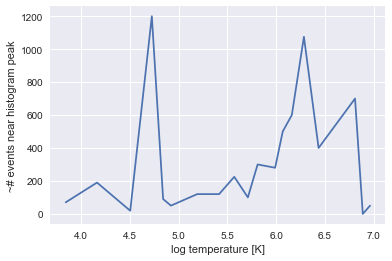

In [29]:
plt.plot(np.log10(temperatures), peak_totals)
plt.xlabel('log temperature [K]')
plt.ylabel('~# events near histogram peak')
plt.savefig('temperature_sorted.png', bbox_inches='tight')

In [ ]:
twotwo['17.1 Depth Max [%]'].dropna()